In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 
X.head()
X.describe()


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_standardized.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


In [4]:
categorical = ["X6", "X8"]

for var in categorical:
    print(f"--- {var} ---")
    counts = X[var].value_counts().sort_index()  # sort by category
    percentages = X[var].value_counts(normalize=True).sort_index() * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(summary)

--- X6 ---
    Count  Percentage
X6                   
2     192        25.0
3     192        25.0
4     192        25.0
5     192        25.0
--- X8 ---
    Count  Percentage
X8                   
0      48        6.25
1     144       18.75
2     144       18.75
3     144       18.75
4     144       18.75
5     144       18.75


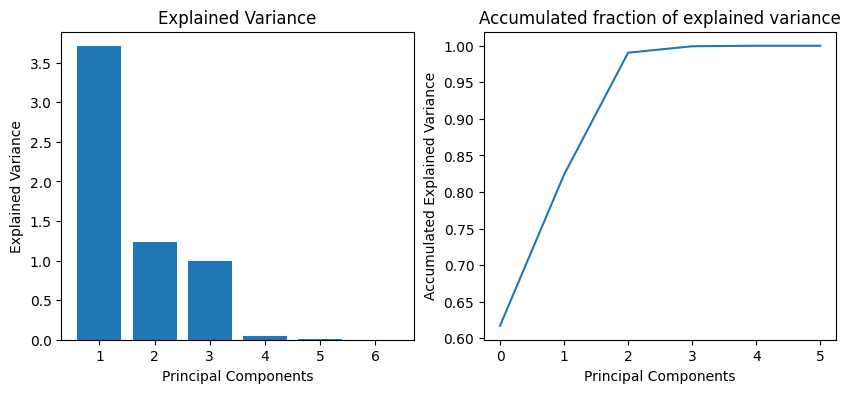

In [ ]:
pca = PCA()
X_cont = X_standardized.drop(columns=["X6", "X8"])
pca.fit(X_cont)


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Explained Variance')
axs[0].set_xlabel('Principal Components')
axs[0].set_ylabel('Explained Variance')


axs[0].bar(range(1, len(pca.components_) + 1), pca.explained_variance_)

axs[1].set_title('Accumulated fraction of explained variance')
axs[1].set_xlabel('Principal Components')
axs[1].set_ylabel('Accumulated Explained Variance')


axs[1].plot(pca.explained_variance_ratio_.cumsum())
plt.show()

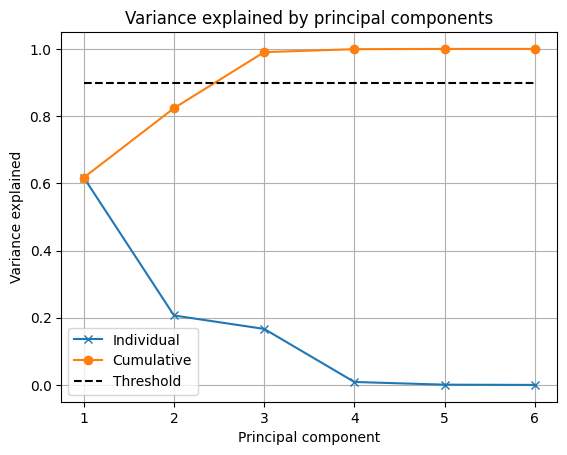

[0.61715655 0.82379843 0.9904651 ]


In [6]:
V = pca.components_.T
rho = pca.explained_variance_ratio_

# 90% threshold for variance explained
threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), rho.cumsum(), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()
print(rho[:3].cumsum())

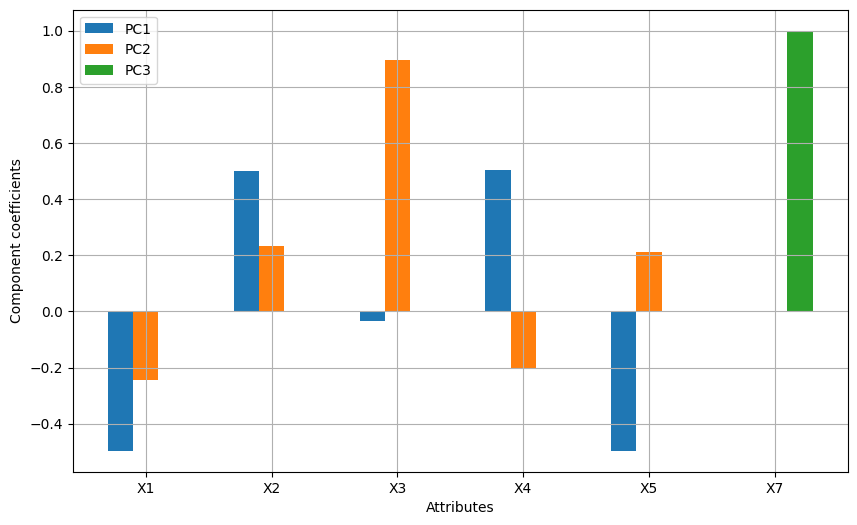

In [7]:
# YOUR CODE HERE
bw = 0.2
r = np.arange(1, X_cont.shape[1] + 1)
V = pca.components_.T
fig = plt.figure(figsize=(10, 6))
for i, pc in enumerate(V[:, :3].T):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")
plt.xticks(r + bw, X_cont.columns)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()
    

/tmp/ipykernel_78939/664288280.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


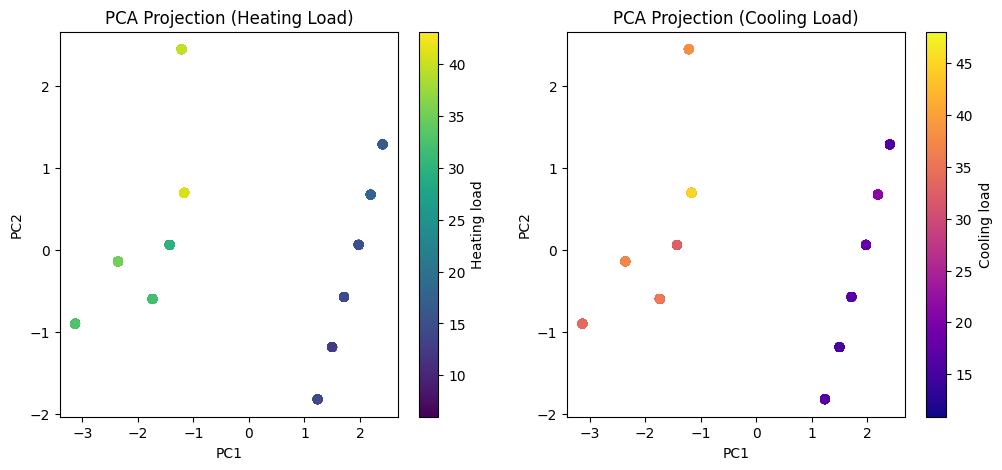

In [29]:
pca2 = PCA()
B = pca.transform(X_cont)

Y1 = y['Y1'].values
Y2 = y['Y2'].values

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

sc1 = axs[0].scatter(B[:, 0], B[:, 1], c=Y1, cmap="viridis")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].set_title("PCA Projection (Heating Load)")
fig.colorbar(sc1, ax=axs[0], label="Heating load")


# Scatter plot colored by Cooling Load
sc2 = axs[1].scatter(B[:, 0], B[:, 1], c=Y2, cmap='plasma')
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].set_title("PCA Projection (Cooling Load)")
fig.colorbar(sc2, ax=axs[1], label="Cooling load")
fig.show()